In [2]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from cutword import *
import os 
import numpy as np
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [3]:
work_dir = os.getcwd()
read_data_dir = os.path.join(work_dir, 'read_data')
df = pd.read_csv(os.path.join(read_data_dir, 'text.csv'))
list_dict_data = term_to_dict(df)
len(list_dict_data)

Building prefix dict from C:\Users\Evan\Documents\GitHub\HW2_Text_Mining\read_data\dict.txt.big ...
Loading model from cache C:\Users\Evan\AppData\Local\Temp\jieba.u404702e2e6e1e6cf284829aafb7ac2e4.cache
Loading model cost 1.185 seconds.
Prefix dict has been built succesfully.


22

## Create a list contain all the independent words 

In [4]:
list_words = []
for i in range(len(list_dict_data)):
    for key, value in list_dict_data[i]['cutted_dict'].items():
        if key not in list_words:
            list_words.append(key)

## Find out each term exist in list or not 

In [5]:
dict_fund = {}
for i in range(len(list_dict_data)):
    list_word_occ = []
    fund_name = list_dict_data[i]['fund']

    for word in list_words:
        if word in list_dict_data[i]['cutted_dict'].keys():
            list_word_occ.append(1)
        else:
            list_word_occ.append(0)
    dict_fund[fund_name] = list_word_occ


In [6]:
df_terms = pd.DataFrame(dict_fund).T
df_terms.columns = list_words
df_terms.head(5)

,投資,策略,長期投資,股價,波動,大於,標的,本身,價值,然,...,採集,中選,前瞻性,高度,局用,交換,傳輸,用戶,終端設備,網際網路
元大高科技,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
日盛高科技,1,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
台新2000高科技,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
永豐高科技,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
永豐領航科技,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Initialize the Co-oocurence

In [7]:
cooc = df_terms.T.dot(df_terms)
cooc.head(5)
# ax = sns.heatmap(cooccurrence_matrix, linewidths=.5)

,投資,策略,長期投資,股價,波動,大於,標的,本身,價值,然,...,採集,中選,前瞻性,高度,局用,交換,傳輸,用戶,終端設備,網際網路
投資,21,14,1,5,3,1,8,1,10,1,...,1,1,1,1,1,1,1,1,1,1
策略,14,15,1,4,2,1,6,1,6,1,...,1,1,1,1,1,1,1,1,1,1
長期投資,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
股價,5,4,1,5,2,1,4,1,3,1,...,0,0,0,0,0,0,0,0,0,0
波動,3,2,1,2,3,1,3,1,2,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
cooc_percentage = cooc.divide(np.diag(cooc), axis='rows')
cooc_percentage.head(5)

,投資,策略,長期投資,股價,波動,大於,標的,本身,價值,然,...,採集,中選,前瞻性,高度,局用,交換,傳輸,用戶,終端設備,網際網路
投資,1.000000,0.666667,0.047619,0.238095,0.142857,0.047619,0.380952,0.047619,0.476190,0.047619,...,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619
策略,0.933333,1.000000,0.066667,0.266667,0.133333,0.066667,0.400000,0.066667,0.400000,0.066667,...,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667
長期投資,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
股價,1.000000,0.800000,0.200000,1.000000,0.400000,0.200000,0.800000,0.200000,0.600000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
波動,1.000000,0.666667,0.333333,0.666667,1.000000,0.333333,1.000000,0.333333,0.666667,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


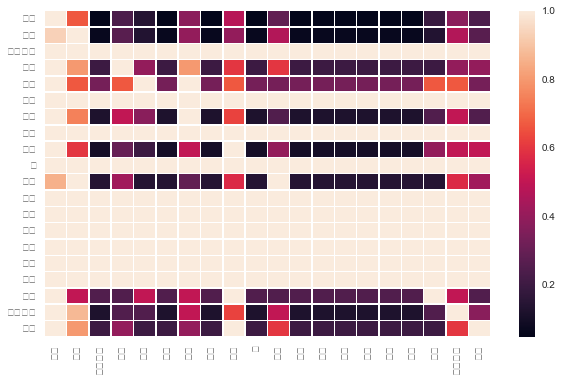

In [9]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax = sns.heatmap(cooc_percentage.iloc[:20, :20], linewidths=.5,)

## Plotting co-oocurence Network

In [10]:
#add weights to edges
edge_list = [] #test networkx
for index, row in cooc.iterrows():
    i = 0
    for col in row:
        weight = float(col)/len(list_dict_data)
        edge_list.append((index, cooc.columns[i], weight))
        i += 1

In [11]:
edge_list[:5]

[('投資', '投資', 0.9545454545454546),
 ('投資', '策略', 0.6363636363636364),
 ('投資', '長期投資', 0.045454545454545456),
 ('投資', '股價', 0.22727272727272727),
 ('投資', '波動', 0.13636363636363635)]

In [12]:
#Remove edge if 0.0
updated_edge_list = [x for x in edge_list if not x[2] <= 0.2]

#create duple of char, occurance in novel
node_list = []
for i in list_words:
    for e in updated_edge_list:
        if i == e[0] and i == e[1]:
            node_list.append((i, e[2]*6))
for i in node_list:
    if i[1] == 0.0:
        node_list.remove(i)

#remove self references
for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)

In [13]:
updated_edge_list[:5]

[('投資', '策略', 0.6363636363636364),
 ('投資', '股價', 0.22727272727272727),
 ('投資', '標的', 0.36363636363636365),
 ('投資', '價值', 0.45454545454545453),
 ('投資', '市場', 0.2727272727272727)]

In [14]:
node_list[:5]

[('投資', 5.7272727272727275),
 ('策略', 4.090909090909091),
 ('股價', 1.3636363636363635),
 ('標的', 2.1818181818181817),
 ('價值', 2.727272727272727)]

In [15]:
import networkx as nx
import matplotlib.font_manager as font_manager
font_path = 'msjh.ttc'
myfont = font_manager.FontProperties(fname='msjh.ttc',
                                   weight='bold',
                                   style='normal', size=16)

In [18]:
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

            
#reorder edge list - this was a pain
test = nx.get_edge_attributes(G, 'weight')
# updated_again_edges = []
# for i in nx.edges(G):
#     for x in test.keys():
#         if i[0] == x[0] and i[1] == x[1]:
#             updated_again_edges.append(test[x])

In [19]:
edges_order = []
for value in test.values():
    edges_order.append(value)

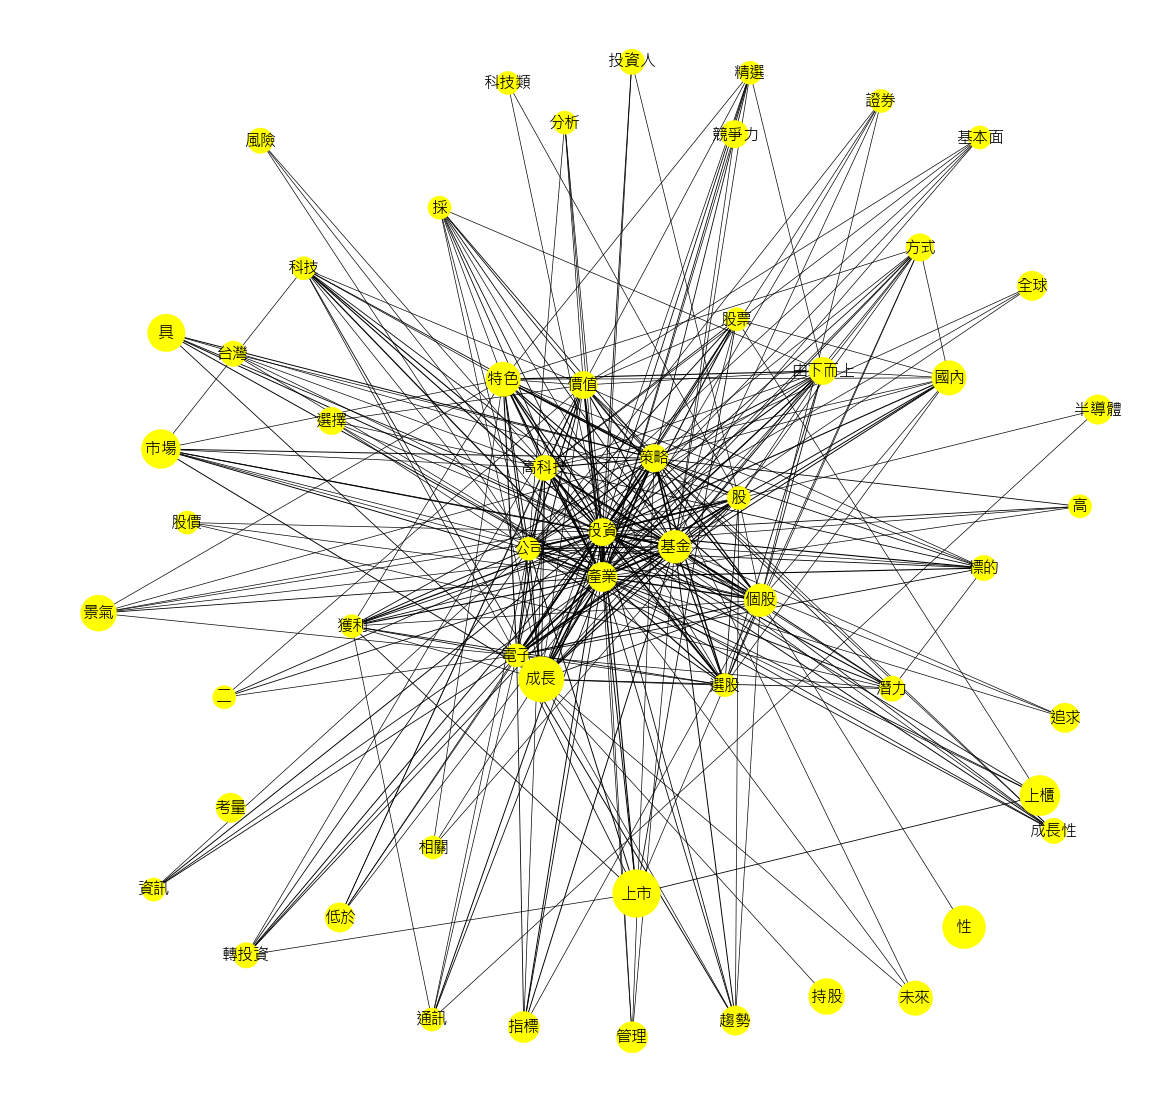

In [20]:
#drawing custimization
plt.rcParams['font.sans-serif'] = ['SimHei','Arial']
plt.subplots(figsize=(20,20))
node_scalar = 400
edge_scalar = 3
sizes = [x[1]*node_scalar for x in node_list]
widths = [x*edge_scalar for x in edges_order]

#draw the graph
pos = nx.spring_layout(G, k=0.42, iterations=12)
nx.set_fontproperties(myfont)
nx.draw(G, pos, with_labels=True, font_size = 1,style = 'solid', node_color = 'yellow',
        node_size = sizes, width = widths)
plt.axis('off')
plt.savefig("picture/network1.png") # save as png
